In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [77]:
from scipy import stats
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Lab - Final Round

## First Analyses and Cleaning

In [3]:
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
data.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [7]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
data = data.drop_duplicates()
data.shape

(9134, 24)

There are no duplicates on the dataset

In [9]:
data.columns = [col_name.lower().replace(' ','_') for col_name in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
data = data.drop('customer', axis=1)

In [11]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_date'].isna().sum()

0

<Axes: xlabel='number_of_open_complaints', ylabel='Density'>

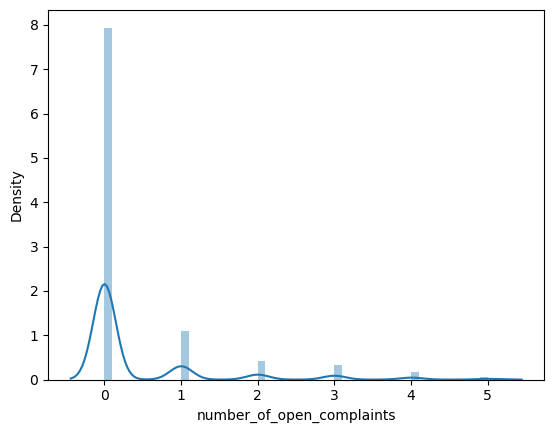

In [12]:
sns.distplot(data['number_of_open_complaints'])

<Axes: xlabel='number_of_policies', ylabel='Density'>

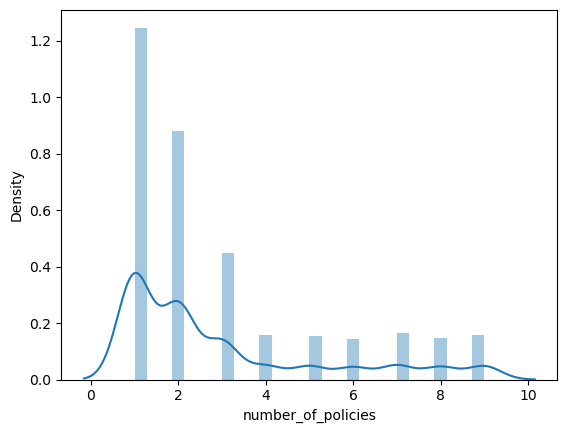

In [13]:
sns.distplot(data['number_of_policies'])

In [14]:
data['number_of_open_complaints'] = data['number_of_open_complaints'].astype('object')
data['number_of_policies'] = data['number_of_policies'].astype('object')

## EDA

In [15]:
data.query('response == "No"')['total_claim_amount']

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9128     541.282007
9129     198.234764
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 7826, dtype: float64

In [16]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)

In [17]:
categoricals.head(2)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [18]:
numericals.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935


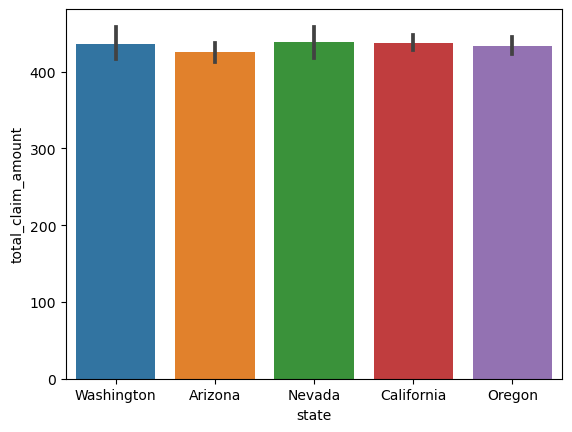

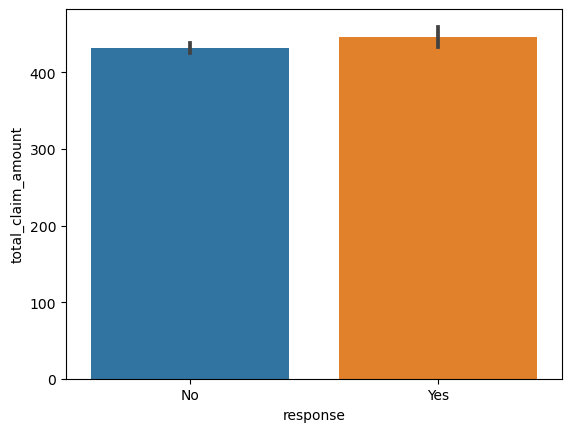

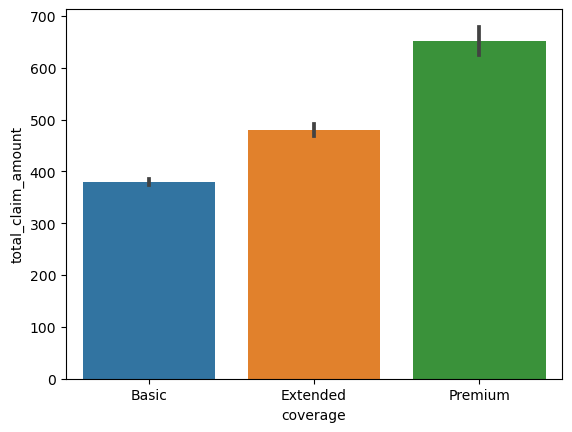

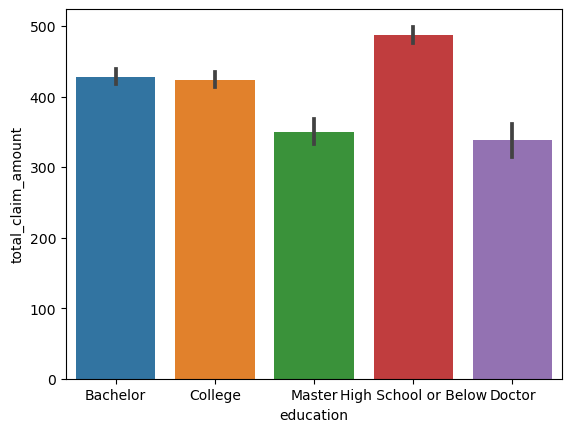

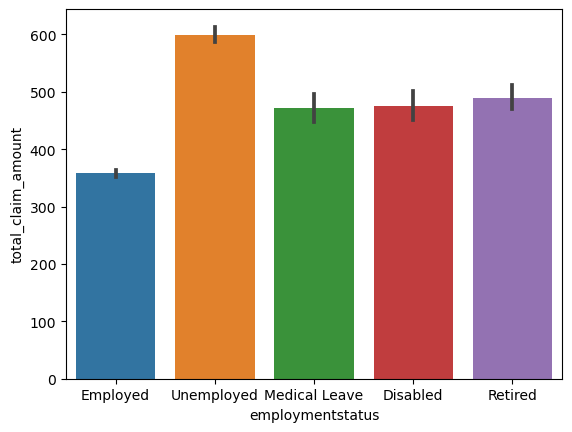

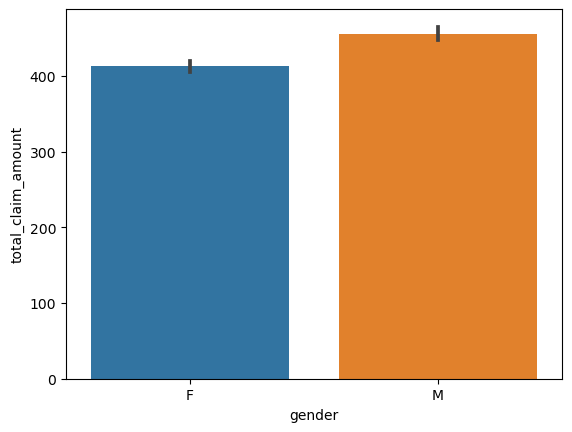

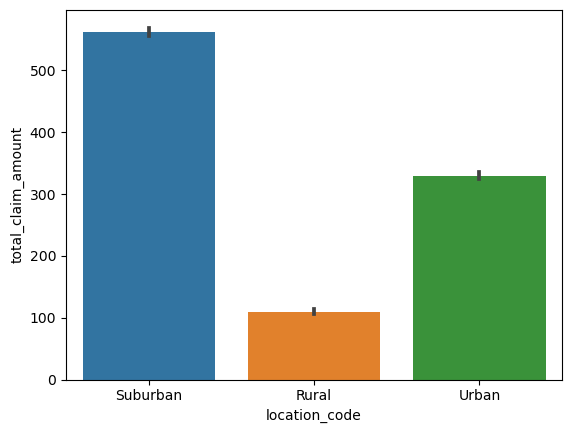

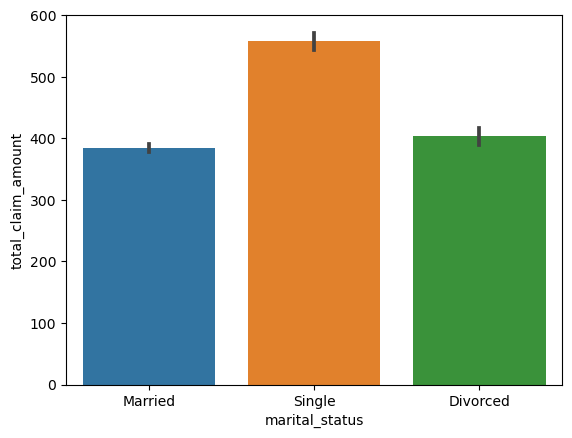

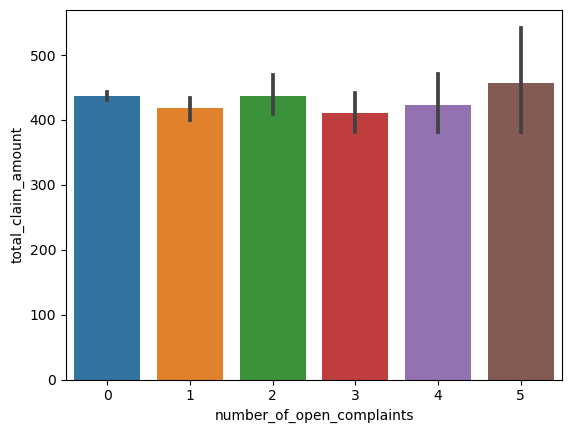

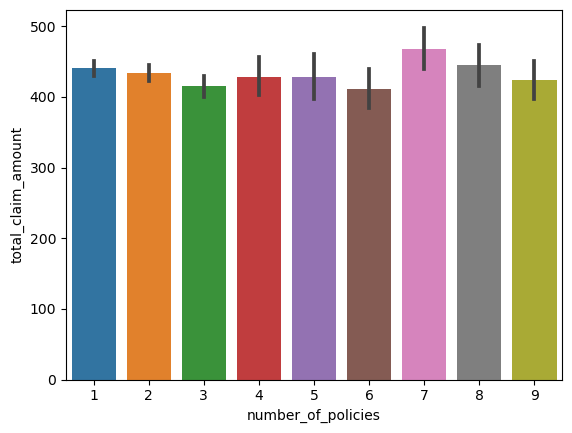

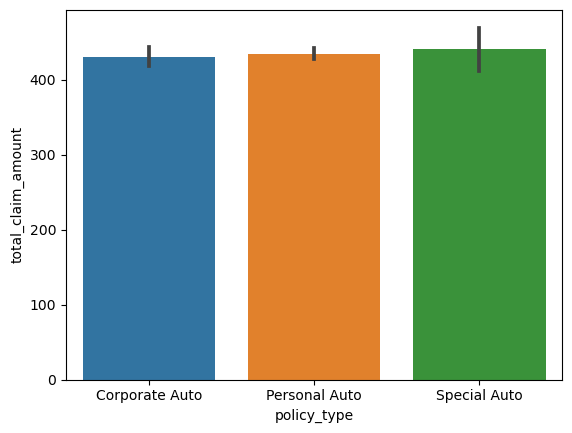

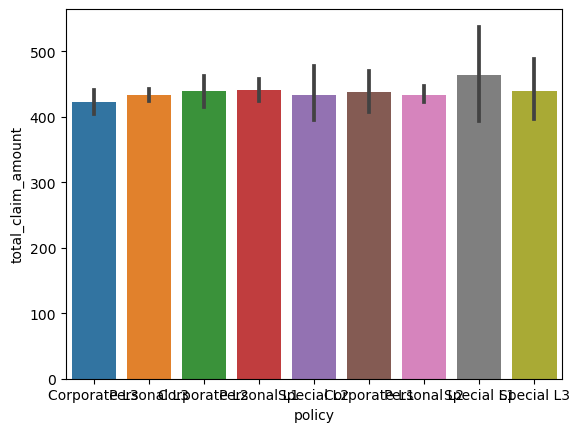

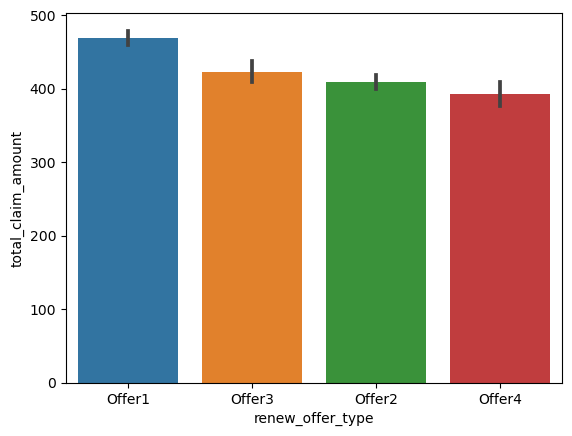

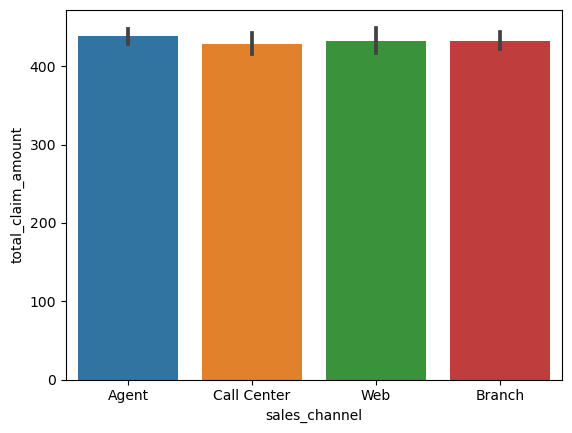

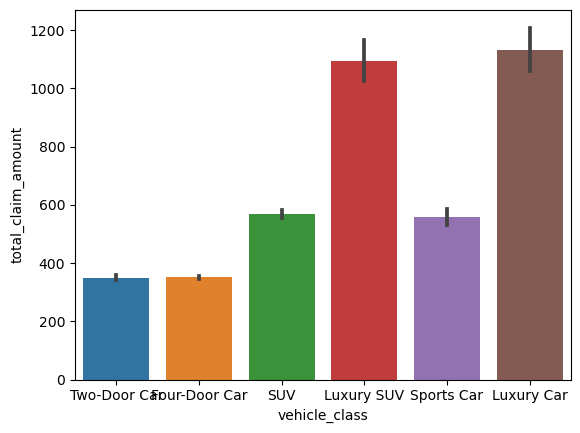

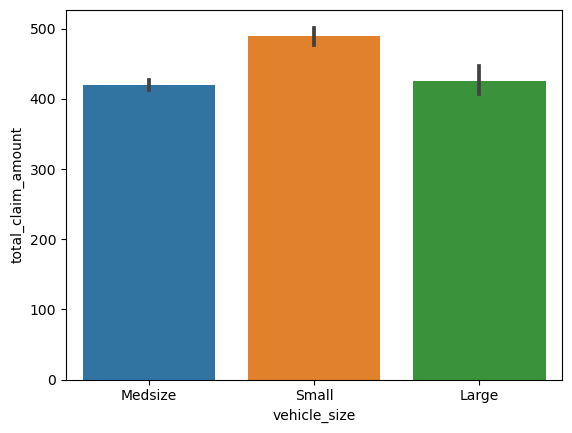

In [19]:
for col in categoricals.columns:
    sns.barplot(x=col, y=data['total_claim_amount'], data=data)
    plt.show()

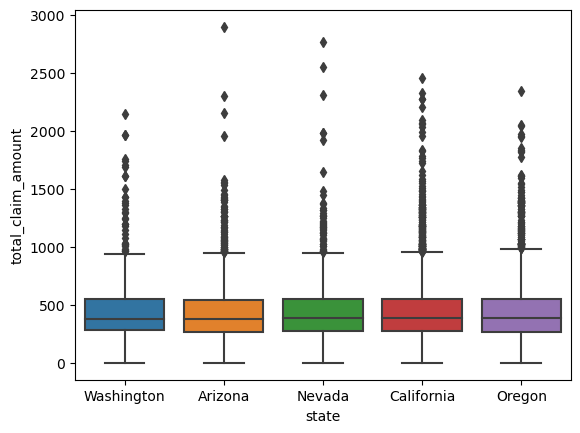

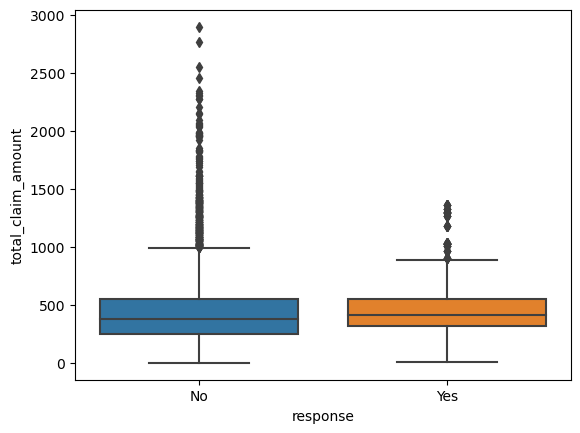

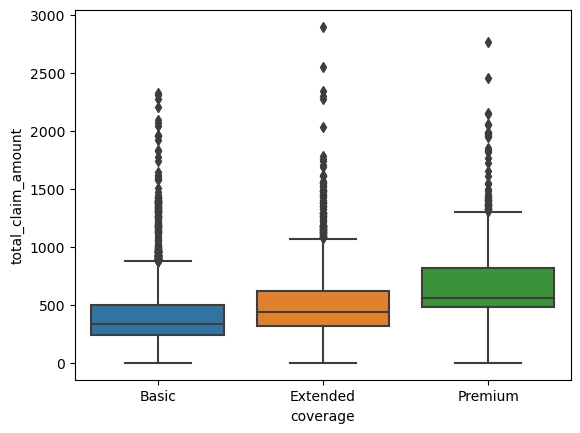

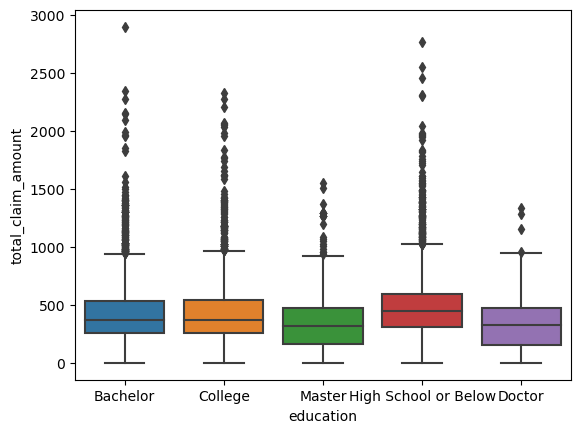

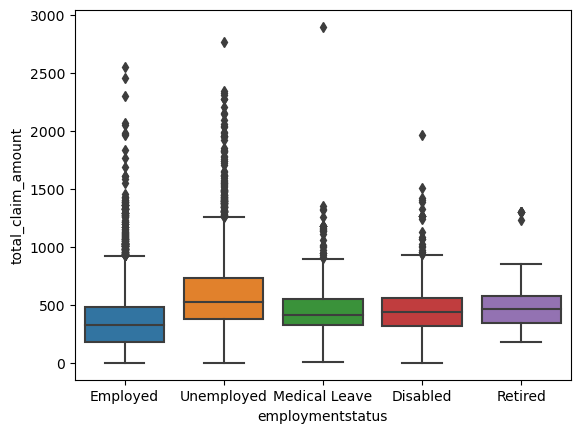

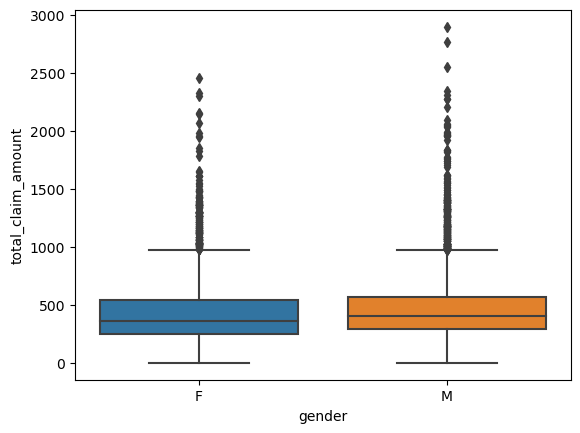

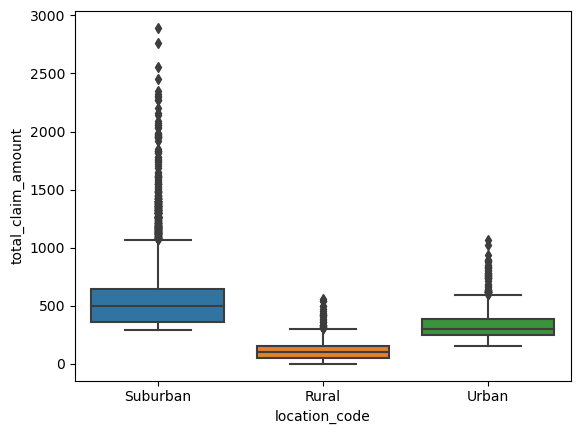

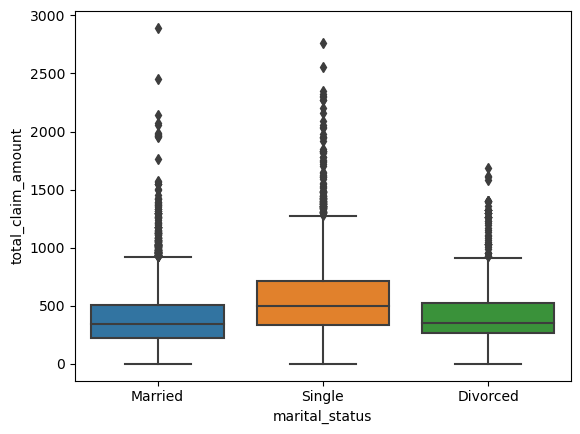

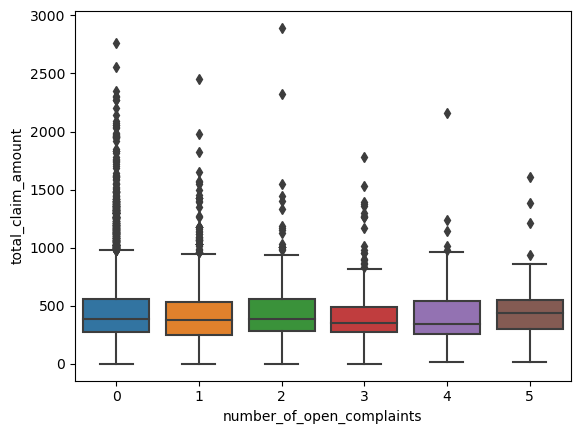

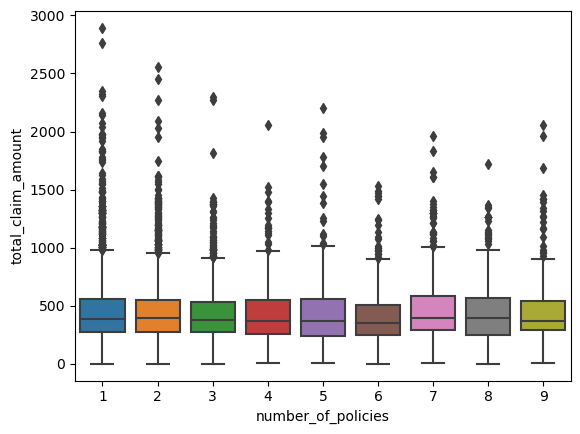

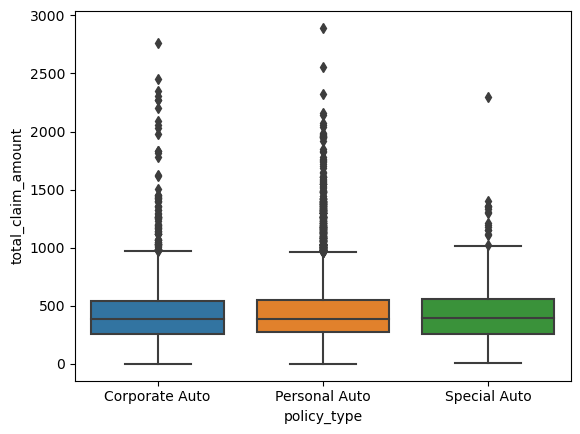

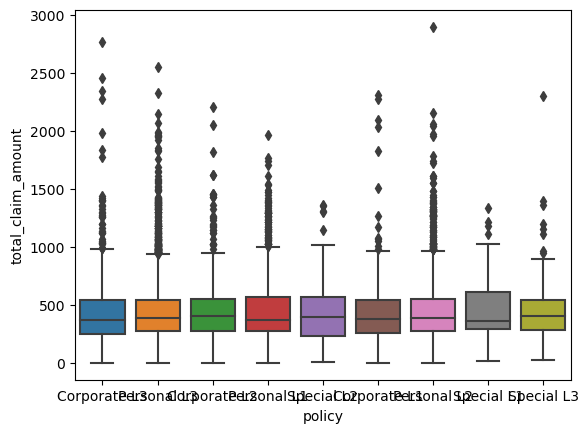

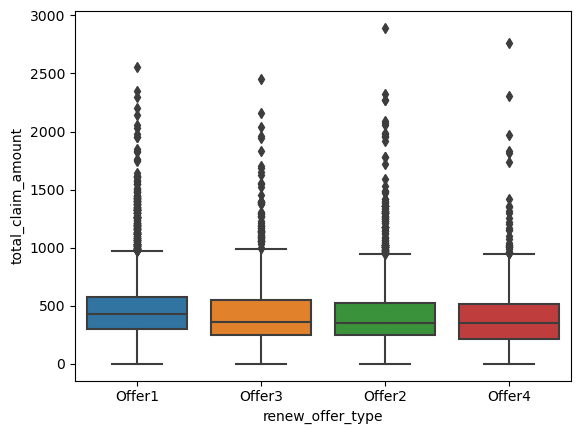

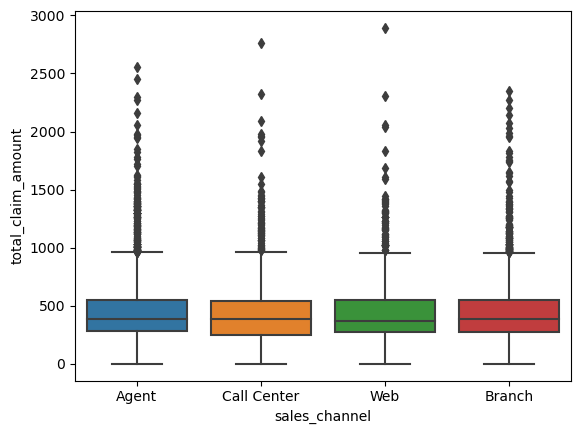

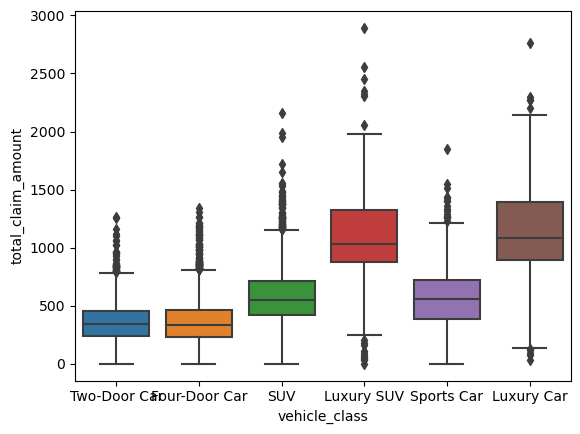

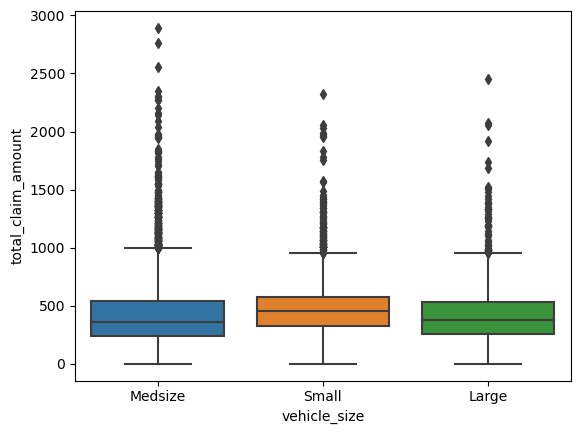

In [20]:
for col in categoricals.columns:
    sns.boxplot(x=col, y=data['total_claim_amount'], data=data)
    plt.show()

Analyzing both barplots and boxplots for each column I could identify that the columns coverage, location_code and vehicle_class, seems to have influenced the total claim amount differently for each category. So I'm assuming that these columns are categorical ordinals. The other categorical columns I'll assume that are nominals.

## Processing Data

customer_lifetime_value


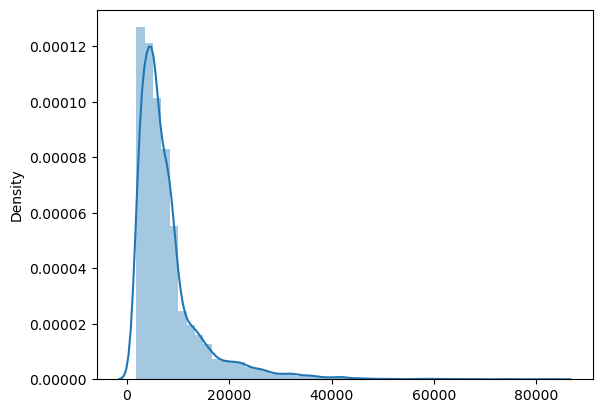

income


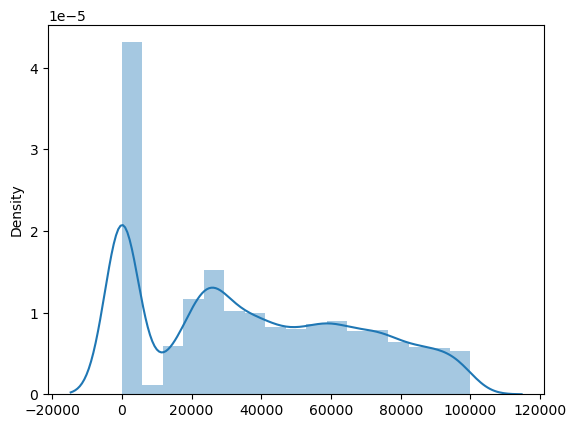

monthly_premium_auto


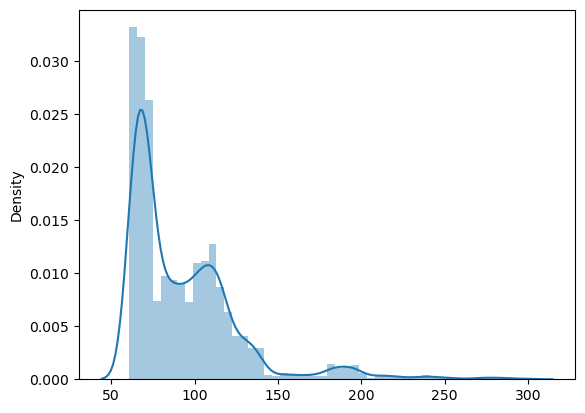

months_since_last_claim


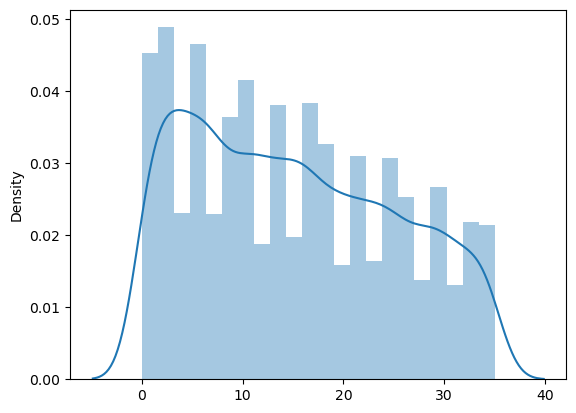

months_since_policy_inception


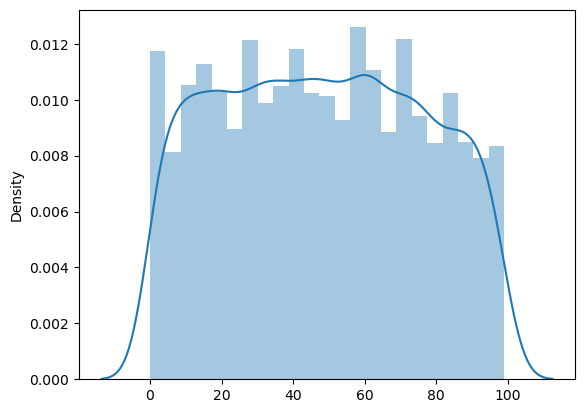

total_claim_amount


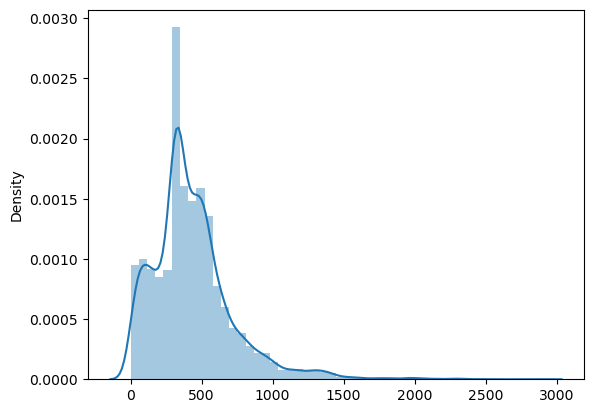

In [21]:
for col in numericals.columns:
    print(col)
    sns.distplot(x=numericals[col])
    plt.show()

I'll visualize the distributions plots for the variables that contains outliers and try to find how should i deal with them

<Axes: xlabel='customer_lifetime_value', ylabel='Density'>

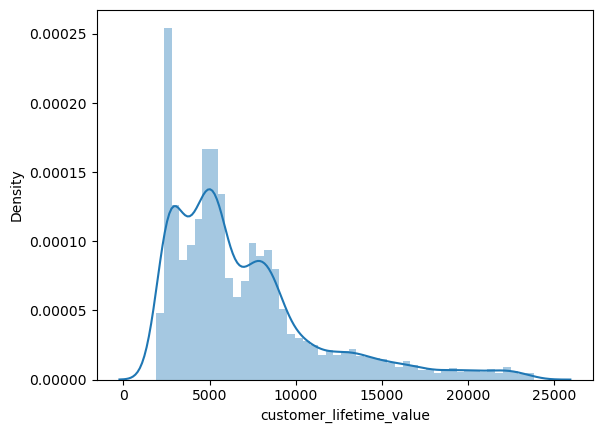

In [22]:
clv_iqr = np.percentile(numericals['customer_lifetime_value'], 75) - np.percentile(numericals['customer_lifetime_value'], 25)
clv_up_lim = np.percentile(numericals['customer_lifetime_value'], 75) + 3*clv_iqr
clv_low_lim = np.percentile(numericals['customer_lifetime_value'], 25) - 3*clv_iqr
clv_filtered = numericals[(numericals['customer_lifetime_value'] < clv_up_lim) & (numericals['customer_lifetime_value'] > clv_low_lim)]
sns.distplot(clv_filtered.customer_lifetime_value)

In [23]:
clv_filtered.shape

(8767, 6)

<Axes: xlabel='monthly_premium_auto', ylabel='Density'>

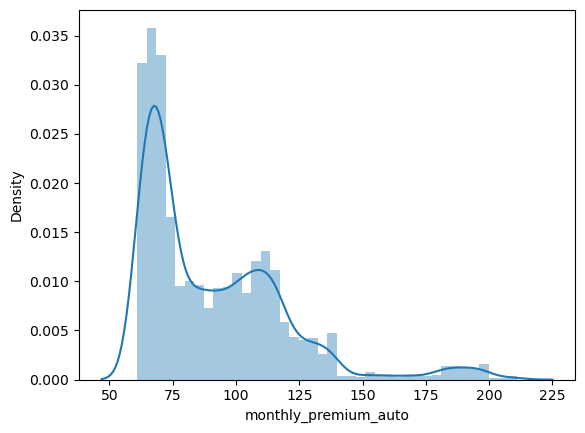

In [24]:
mpa_iqr = np.percentile(numericals['monthly_premium_auto'], 75) - np.percentile(numericals['monthly_premium_auto'], 25)
mpa_up_lim = np.percentile(numericals['monthly_premium_auto'], 75) + 2.5*mpa_iqr
mpa_low_lim = np.percentile(numericals['monthly_premium_auto'], 25) - 2.5*mpa_iqr
mpa_filtered = numericals[(numericals['monthly_premium_auto'] < mpa_up_lim) & (numericals['monthly_premium_auto'] > mpa_low_lim)]
sns.distplot(mpa_filtered.monthly_premium_auto)

In [25]:
mpa_filtered.shape

(8999, 6)

<Axes: xlabel='total_claim_amount', ylabel='Density'>

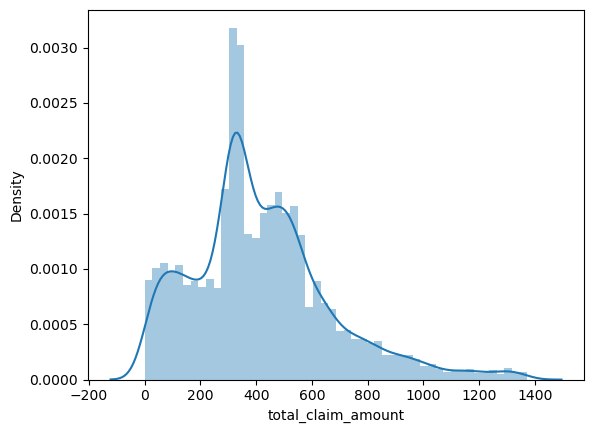

In [26]:
tca_iqr = np.percentile(numericals['total_claim_amount'], 75) - np.percentile(numericals['total_claim_amount'], 25)
tca_up_lim = np.percentile(numericals['total_claim_amount'], 75) + 3*tca_iqr
tca_low_lim = np.percentile(numericals['total_claim_amount'], 25) - 3*tca_iqr
tca_filtered = numericals[(numericals['total_claim_amount'] < tca_up_lim) & (numericals['total_claim_amount'] > tca_low_lim)]
sns.distplot(tca_filtered.total_claim_amount)

In [27]:
tca_filtered.shape

(9019, 6)

In [28]:
# with this function i'm looking for whats is a reasonable outliers count for each numerical column

def find_outlier(df_column, x):
    iqr = np.percentile(df_column, 75) - np.percentile(df_column, 25)
    up_lim = np.percentile(df_column, 75) + x*iqr
    low_lim = np.percentile(df_column, 25) - x*iqr
    outliers = numericals[(df_column > up_lim) | (df_column < low_lim)]
    return outliers.shape

In [29]:
find_outlier(numericals.customer_lifetime_value, 3)

(367, 6)

In [30]:
find_outlier(numericals.monthly_premium_auto, 2.5)

(135, 6)

In [31]:
find_outlier(numericals.total_claim_amount, 3)

(115, 6)

I'm ok with this outliers count. I'm not loosing too much data, and I could deal with the long tails of the distributions

In [32]:
data_filtered = data[((data['customer_lifetime_value'] < clv_up_lim) & (data['customer_lifetime_value'] > clv_low_lim)) &
                     ((data['monthly_premium_auto'] < mpa_up_lim) & (data['monthly_premium_auto'] > mpa_low_lim)) &
                     ((data['total_claim_amount'] < tca_up_lim) & (data['total_claim_amount'] > tca_low_lim))]

In [33]:
data_filtered.shape

(8590, 23)

In [34]:
data_filtered = data_filtered.reset_index(drop=True)

In [53]:
data_filtered

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.00,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.01,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.00,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.01,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.00,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.00,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8586,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.00,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8587,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0.01,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8588,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941.00,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [36]:
def log_transf(x):
    if x > 0:
        return np.log(x)
    else:
        return np.nan

In [37]:
def power_transf(x):
    return np.sqrt(x)

In [38]:
def boxcox_transf(x):
        return pd.Series(stats.boxcox(x)[0])

<Axes: ylabel='Density'>

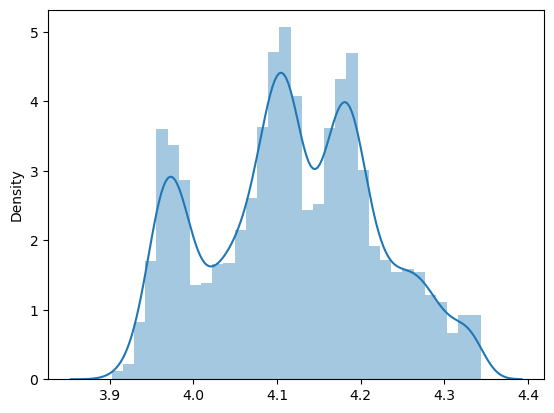

In [39]:
cvl_transf = boxcox_transf(data_filtered['customer_lifetime_value'])
sns.distplot(cvl_transf)

I tried log, power and boxcox transf for the customer_lifetime_value column, but none of these resulted in a normal distribution. So I'll keep this column as it is.

In [40]:
data_filtered['income'] = np.where(data_filtered['income']==0, 0.01, data_filtered['income'])
# So I dont need to work on the null values after

<Axes: ylabel='Density'>

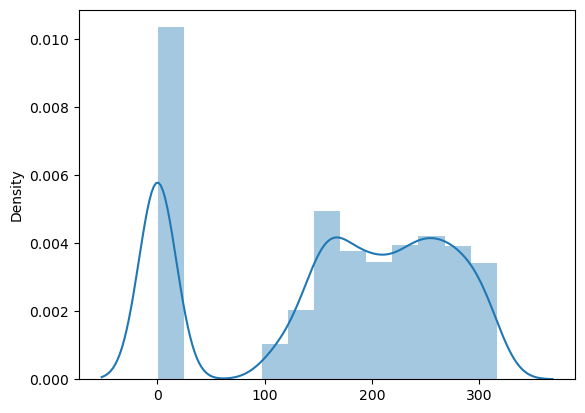

In [43]:
income_transf = list(map(power_transf, data_filtered['income']))
sns.distplot(income_transf)

I tried log, power and boxcox transf for the income column, but none of these resulted in a normal distribution. So I'll keep this column as it is.

<Axes: ylabel='Density'>

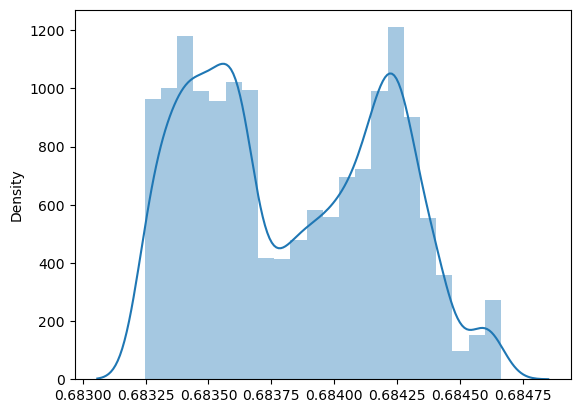

In [48]:
mpa_transf = boxcox_transf(data_filtered['monthly_premium_auto'])
sns.distplot(mpa_transf)

I tried log, power and boxcox transf for the monthly_premium_auto column, but none of these resulted in a normal distribution. So I'll keep this column as it is.

<Axes: ylabel='Density'>

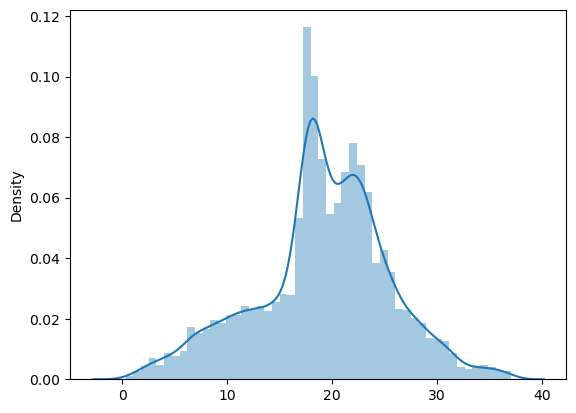

In [51]:
tca_transf = list(map(power_transf, data_filtered['total_claim_amount']))
sns.distplot(tca_transf)

The total_claim_amount column got similar results when i used the boxcox transformation and the power transformation. I choose to keep the power transformation.

In [55]:
data_filtered['total_claim_amount'] = tca_transf
data_filtered

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.00,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,19.616604,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.01,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,33.637255,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.00,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,23.800677,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.01,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,23.019152,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.00,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,11.752909,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.00,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,14.079587,Four-Door Car,Medsize
8586,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.00,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,19.473058,Four-Door Car,Medsize
8587,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0.01,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,28.120899,Four-Door Car,Medsize
8588,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941.00,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,26.290683,Four-Door Car,Large


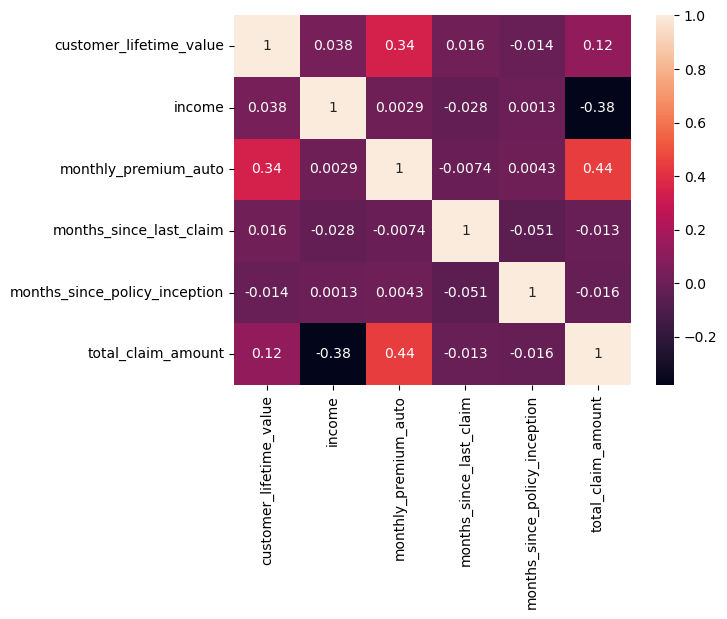

In [57]:
corr_numericals = data_filtered.select_dtypes(np.number).corr()
sns.heatmap(corr_numericals, annot=True)
plt.show()

## Scaling and Encoding

In [58]:
numericals_filtered = data_filtered.select_dtypes(np.number)
categoricals_filtered = data_filtered.select_dtypes(np.object)

In [84]:
numericals_filtered = numericals_filtered.drop(['total_claim_amount'], axis=1)
numericals_filtered.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,2763.519279,56274.00,69,32,5
1,6979.535903,0.01,94,13,42
2,12887.431650,48767.00,108,18,38
3,7645.861827,0.01,106,18,65
4,2813.692575,43836.00,73,12,44


In [65]:
categoricals_filtered.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [85]:
scaler = Normalizer().fit_transform(numericals_filtered)
scaled = pd.DataFrame(scaler)
scaled

,0,1,2,3,4
0,0.049049,0.998795,0.001225,0.000568,0.000089
1,0.999889,0.000001,0.013466,0.001862,0.006017
2,0.255494,0.966808,0.002141,0.000357,0.000753
3,0.999865,0.000001,0.013862,0.002354,0.008500
4,0.064055,0.997944,0.001662,0.000273,0.001002
...,...,...,...,...,...
8585,0.309387,0.950935,0.000965,0.000238,0.001176
8586,0.141879,0.989876,0.003620,0.000641,0.001283
8587,0.999935,0.000001,0.010411,0.001102,0.004532
8588,0.324391,0.945913,0.004139,0.001466,0.000129


In [78]:
# coverage, location_code and vehicle_class are categorical ordinals, so i'll encode them with ordinal encoder
# the other columns will be encoded with OneHotEncoder

In [73]:
ordinals_filtered = categoricals_filtered[['coverage', 'location_code', 'vehicle_class']]
nominals_filtered = categoricals_filtered.drop(['coverage', 'location_code', 'vehicle_class'], axis=1)

In [79]:
ordinals_encoder = OrdinalEncoder().fit_transform(ordinals_filtered)
ordinals_encoded = pd.DataFrame(ordinals_encoder)
ordinals_encoded

,0,1,2
0,0.0,1.0,5.0
1,1.0,1.0,0.0
2,2.0,1.0,5.0
3,0.0,1.0,3.0
4,0.0,0.0,0.0
...,...,...,...
8585,0.0,2.0,0.0
8586,1.0,1.0,0.0
8587,1.0,1.0,0.0
8588,1.0,1.0,0.0


In [82]:
nominals_encoder = OneHotEncoder(drop='first').fit_transform(nominals_filtered).toarray()
nominals_encoded = pd.DataFrame(nominals_encoder)
nominals_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8586,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8587,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8588,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [86]:
features_consolidated = pd.concat([scaled, nominals_encoded, ordinals_encoded], axis=1)
features_consolidated.head()

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,0,1,2
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0
1,0.999889,0.000001,0.013466,0.001862,0.006017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0
3,0.999865,0.000001,0.013862,0.002354,0.008500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
y = data_filtered['total_claim_amount']
y.head()

0    19.616604
1    33.637255
2    23.800677
3    23.019152
4    11.752909
Name: total_claim_amount, dtype: float64

## Linear Regression

In [88]:
features_consolidated.shape

(8590, 55)

In [89]:
y.shape

(8590,)

In [90]:
x_train, x_test, y_train, y_test = train_test_split(features_consolidated, y, test_size=0.2, random_state=1)

In [91]:
lm = LinearRegression().fit(x_train, y_train)

In [92]:
lm.score(x_test, y_test)

0.47602633766896085

In [93]:
y_predictions = lm.predict(x_test)
y_predictions

array([17.08121816, 29.6383891 , 25.51718996, ..., 16.93163863,
       20.62527152, 23.05365494])

In [94]:
y_test

6235    23.186203
1104    27.495454
6421    26.427259
3258    17.630714
5712    18.253487
          ...    
1773    14.416242
5415    21.354157
2227    18.330303
8251    21.346054
1814    15.572134
Name: total_claim_amount, Length: 1718, dtype: float64

In [95]:
RMSE = mean_squared_error(y_true=y_test, y_pred=y_predictions, squared=False)
RMSE

4.633944007450297

In [96]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_predictions)
MAE

3.657951928821586

## Improving the model

First, I'll try to encode all the categoricals with OneHotEncoder

In [98]:
encoder = OneHotEncoder(drop='first').fit_transform(categoricals_filtered).toarray()
encoded = pd.DataFrame(encoder)
encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8586,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8587,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8588,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
features_consolidated = pd.concat([scaled, encoded], axis = 1)
features_consolidated

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.999889,0.000001,0.013466,0.001862,0.006017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.999865,0.000001,0.013862,0.002354,0.008500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,0.309387,0.950935,0.000965,0.000238,0.001176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8586,0.141879,0.989876,0.003620,0.000641,0.001283,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8587,0.999935,0.000001,0.010411,0.001102,0.004532,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8588,0.324391,0.945913,0.004139,0.001466,0.000129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
x_train, x_test, y_train, y_test = train_test_split(features_consolidated, y, test_size=0.2, random_state=1)

In [101]:
lm = LinearRegression().fit(x_train, y_train)

In [102]:
lm.score(x_test, y_test)

0.8142799761047228

In [103]:
y_predictions = lm.predict(x_test)
y_predictions

array([23.705801  , 27.84569267, 24.12679456, ..., 20.17892861,
       19.09648351, 15.80019867])

In [104]:
y_test

6235    23.186203
1104    27.495454
6421    26.427259
3258    17.630714
5712    18.253487
          ...    
1773    14.416242
5415    21.354157
2227    18.330303
8251    21.346054
1814    15.572134
Name: total_claim_amount, Length: 1718, dtype: float64

In [105]:
RMSE = mean_squared_error(y_true=y_test, y_pred=y_predictions, squared=False)
RMSE

2.7588330399168735

In [106]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_predictions)
MAE

2.1020729398275777

Results: Encoding all the categoricals with OneHotEncoder worked much better than separating the ordinals and nominals.
         
         Previous R² = 0.47602633766896085
         New R² = 0.8142799761047228
         
         Previous RMSE = 4.633944007450297
         New RMSE = 2.7588330399168735
         
         Previous MAE = 3.657951928821586
         New MAE = 2.1020729398275777

Now, I'll scale the numericals with a different method, the MinMaxScaler

In [107]:
scaler = MinMaxScaler().fit_transform(numericals_filtered)
scaled = pd.DataFrame(scaler)
scaled

,0,1,2,3,4
0,0.039493,0.562847,0.053333,0.914286,0.050505
1,0.231869,0.000000,0.220000,0.371429,0.424242
2,0.501445,0.487763,0.313333,0.514286,0.383838
3,0.262273,0.000000,0.300000,0.514286,0.656566
4,0.041782,0.438443,0.080000,0.342857,0.444444
...,...,...,...,...,...
8585,0.981404,0.719547,0.080000,0.514286,0.898990
8586,0.054687,0.216081,0.120000,0.400000,0.282828
8587,0.285911,0.000000,0.160000,0.257143,0.373737
8588,0.256733,0.219452,0.233333,0.971429,0.030303


In [108]:
features_consolidated = pd.concat([scaled, encoded], axis = 1)
features_consolidated

,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,0.039493,0.562847,0.053333,0.914286,0.050505,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.231869,0.000000,0.220000,0.371429,0.424242,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.501445,0.487763,0.313333,0.514286,0.383838,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.262273,0.000000,0.300000,0.514286,0.656566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.041782,0.438443,0.080000,0.342857,0.444444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,0.981404,0.719547,0.080000,0.514286,0.898990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8586,0.054687,0.216081,0.120000,0.400000,0.282828,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8587,0.285911,0.000000,0.160000,0.257143,0.373737,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8588,0.256733,0.219452,0.233333,0.971429,0.030303,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
x_train, x_test, y_train, y_test = train_test_split(features_consolidated, y, test_size=0.2, random_state=1)

In [110]:
lm = LinearRegression().fit(x_train, y_train)

In [111]:
lm.score(x_test, y_test)

0.8168048243572548

In [112]:
y_predictions = lm.predict(x_test)
y_predictions

array([23.78232908, 26.2332497 , 24.76921961, ..., 20.44545519,
       18.95765351, 16.17161483])

In [113]:
RMSE = mean_squared_error(y_true=y_test, y_pred=y_predictions, squared=False)
RMSE

2.740015813736829

In [114]:
MAE = mean_absolute_error(y_true=y_test, y_pred=y_predictions)
MAE

2.0719480520524636

Results: Scaling the numericals with MinMaxScaler was slightly better than with Normalizer.
         
         Previous R² = 0.8142799761047228
         New R² = 0.8168048243572548
         
         Previous RMSE = 2.7588330399168735
         New RMSE = 2.740015813736829
         
         Previous MAE = 2.1020729398275777
         New MAE = 2.0719480520524636